load data

In [3]:
import os
import json
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

base_dir = r"D:\LingoMalay\Models_Transcribe\Dataset\dialects-processed-0-0\dialects_processed"
all_mp3_paths = []
# Collect all JSON files in the directory and its subdirectories
all_texts = []

# Normalize and support extended-length paths for Windows
def safe_path(p):
    return r"\\?\{}".format(os.path.abspath(p))

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".json"):
            json_path = os.path.join(root, file)
            folder_name = os.path.basename(root)  # e.g. "!!! Penting Buat..."
            
            try:
                with open(safe_path(json_path), 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    for idx, entry in enumerate(data):
                        if "text" in entry and entry["text"].strip():
                            all_texts.append(entry["text"].strip())

                            # Construct corresponding mp3 filename
                            mp3_filename = f"{folder_name}_{idx}.mp3"
                            mp3_path = os.path.join(root, mp3_filename)

                            all_mp3_paths.append(mp3_path)
            except (FileNotFoundError, OSError, json.JSONDecodeError) as e:
                print(f"Skipping {json_path}: {e}")
                continue

print(f"Total texts loaded: {len(all_texts)}")

Skipping D:\LingoMalay\Models_Transcribe\Dataset\dialects-processed-0-0\dialects_processed\#Pemukimanmanjung2017 Proton City, EduCity, YouthCity Selaras Blueprint Kerajaan Negeri  DSD Dr Zamb [9ddTio75T_M]\#Pemukimanmanjung2017 Proton City, EduCity, YouthCity Selaras Blueprint Kerajaan Negeri  DSD Dr Zamb [9ddTio75T_M].json: Expecting value: line 1 column 1587 (char 1586)
Total texts loaded: 123262


In [4]:

print(f"Total cleaned texts: {len(all_texts)}")
print(f"Total JSON files processed: {len(all_mp3_paths)}")
print(all_texts[0])
print(all_mp3_paths[0])

Total cleaned texts: 123262
Total JSON files processed: 123262
Jemaah kita, Malaysia, nak ke Jamarat ni memang jauh. Memang jauh. Kita biasanya, Jemaah Malaysia, ataupun Asia Tenggara lah, Indonesia, Thailand ni, akan duduk di satu tempat nama Muasir.
D:\LingoMalay\Models_Transcribe\Dataset\dialects-processed-0-0\dialects_processed\!!! Penting Buat Bakal Jemaah Haji - ＂CARA-CARA MELONTAR JAMRAH MENGIKUT SUNNAH RASULULLAH＂ [O15OpWSYGL8]\!!! Penting Buat Bakal Jemaah Haji - ＂CARA-CARA MELONTAR JAMRAH MENGIKUT SUNNAH RASULULLAH＂ [O15OpWSYGL8]_0.mp3


filter data

In [ ]:
import re

def rule_based_filter(sentence):
    kelantan_keywords = [
        'muko', 'napok', 'nok', 'mano', 'bakpo', 'gapo', 'kawe',
        'toksey', 'pitih', 'segho', 'loni', 'mugo', 'kecek', 'molek',
        'ambo', 'tokleh', 'hok', 'jupo', 'kito', 'awok', 'bakpe',
        'sapo', 'ghoyak', 'tokseh', 'dio', 'klaring', 'deh', 'huje',
        'bakpo', 'berapo', 'sedak', 'pulok', 'bekwoh', 'kijo', 'sek', 'dio', 
        'nikoh', 'debek', 'nneja', 'roba', 'saksoba', 'hok', 'bey', 'raso',
        'mace','punoh', 'te', 'kane', 'hek', 'jolo', 'oghe', 'nyenyeh',
        'jumpo', 'ado', 'setaro', 'pitih', 'nate', 'tubik', 'jange',
    ]
    # pikashare, ml studio,
    # belakang a -> o, terngganu a -> ee
    # belakang n -> e, 'terngganu n -> ng

    kedah_keywords = [
        'awat', 'hang', 'pi', 'mai', 'lagu tu', 'dengaq',
        'pa', 'takpa', 'cheq', 'mengai', 'pasaipa', 
        'depa', 'tang mana', 'sat', 'jenuh', 'dok', 'betui',
        'buatpa', 'hangpa', 'mai', 'pikiaq', 'pasai', 'loqlaq',
        'dakgi', 'lani', 'tu dia', 'biaq', 'campuq', 
        'biaq pi', 'dok leh', 'ayaq', 'baguih',
    ]
    # lan petpet, ag coco
    # r -> gh
    # tatau kt blkg ayat
    # kedah more straight, penang more goyang

    # Tokenize into words only
    tokens = re.findall(r'\b\w+\b', sentence)
    lower_words = [w.lower() for w in tokens]

    # Skip proper nouns (capitalized, not first word)
    filtered_tokens = [
        w.lower()
        for i, w in enumerate(tokens)
        if not (w[0].isupper() and i != 0)
    ]

    # Scoring based on filtered tokens
    kelantan_score = sum(w in kelantan_keywords for w in filtered_tokens)
    kedah_score = sum(w in kedah_keywords for w in filtered_tokens)

    if kelantan_score > 0:
        return 'Kelantan'
    elif kedah_score > 0:
        return 'Kedah'
    else:
        return None

    return None

In [5]:
# Step 1: Create initial DataFrame
dialects_df = pd.DataFrame({
    "text": all_texts,
    "mp3_path": all_mp3_paths
})

# Step 2: Apply rule-based filter and store results
dialects_df["dialect"] = dialects_df["text"].apply(rule_based_filter)

# Step 3: Keep only rows where dialect was detected (i.e. not null)
dialects_df = dialects_df[dialects_df["dialect"].notnull()].reset_index(drop=True)

dialects_df

,text,mp3_path,dialect
0,"Kalau pakcik niat iprot, 40 hari pakcik tak bo...",D:\LingoMalay\Models_Transcribe\Dataset\dialec...,Kelantan
1,"Haa, memaafkan orang lain. Maksudnya, dia ni, ...",D:\LingoMalay\Models_Transcribe\Dataset\dialec...,Kedah
2,"Ada pelajar baru ni, baru masuk tahun ni lah. ...",D:\LingoMalay\Models_Transcribe\Dataset\dialec...,Kedah
3,"Ha, ini kan, tuan-tuan, umay sayok tu, lah. Um...",D:\LingoMalay\Models_Transcribe\Dataset\dialec...,Kedah
4,"Look, businesses, freelance projects, relation...",D:\LingoMalay\Models_Transcribe\Dataset\dialec...,Kedah
...,...,...,...
153,Bahkan aku pemilik rumah ni pun Allah dah bagi...,D:\LingoMalay\Models_Transcribe\Dataset\dialec...,Kedah
154,"Saya nak buat katakan, ada benda kadang-kadang...",D:\LingoMalay\Models_Transcribe\Dataset\dialec...,Kedah
155,Hang tak boleh nak lawan dia. Tapi hang nak la...,D:\LingoMalay\Models_Transcribe\Dataset\dialec...,Kedah
156,"Orang yang mulia, orang yang baguih-baguih, Na...",D:\LingoMalay\Models_Transcribe\Dataset\dialec...,Kedah


In [6]:
dialects_df.to_csv("dialects_filtered_1.csv", index=False)
# Save the DataFrame to a CSV file

Chunking audio

In [12]:
from pydub import AudioSegment, silence
import os

# Load audio
# audio = AudioSegment.from_file(r"C:\Users\aqils\Downloads\Indahnya Nikmat Di Syurga _ Pengajian Kitab Sayyidina Muhammad ﷺ - Ustaz Muhaizad Muhammad [FIKfntA42Ww].mp3", format="mp3")
audio = AudioSegment.from_file(r"C:\Users\aqils\Downloads\Pickupline Sekolah 4.mp3", format="mp3")

# Ensure the audio is in stereo format

# Split based on silence
chunks = silence.split_on_silence(
    audio,
    min_silence_len=700,
    silence_thresh=audio.dBFS - 14,
    keep_silence=500
)

# Output folder
output_folder = "Alieff_Irfan"
os.makedirs(output_folder, exist_ok=True)

# Save each chunk
for i, chunk in enumerate(chunks):
    out_path = os.path.join(output_folder, f"Alieff_Irfan_{i+1}.wav")
    chunk.export(out_path, format="wav")
    print(f"Saved: {out_path}")

Saved: Alieff_Irfan\Alieff_Irfan_1.wav
Saved: Alieff_Irfan\Alieff_Irfan_2.wav
Saved: Alieff_Irfan\Alieff_Irfan_3.wav
Saved: Alieff_Irfan\Alieff_Irfan_4.wav
Saved: Alieff_Irfan\Alieff_Irfan_5.wav
Saved: Alieff_Irfan\Alieff_Irfan_6.wav
Saved: Alieff_Irfan\Alieff_Irfan_7.wav
Saved: Alieff_Irfan\Alieff_Irfan_8.wav
Saved: Alieff_Irfan\Alieff_Irfan_9.wav
Saved: Alieff_Irfan\Alieff_Irfan_10.wav
Saved: Alieff_Irfan\Alieff_Irfan_11.wav
Saved: Alieff_Irfan\Alieff_Irfan_12.wav
Saved: Alieff_Irfan\Alieff_Irfan_13.wav
Saved: Alieff_Irfan\Alieff_Irfan_14.wav
Saved: Alieff_Irfan\Alieff_Irfan_15.wav
Saved: Alieff_Irfan\Alieff_Irfan_16.wav
Saved: Alieff_Irfan\Alieff_Irfan_17.wav
Saved: Alieff_Irfan\Alieff_Irfan_18.wav
Saved: Alieff_Irfan\Alieff_Irfan_19.wav
Saved: Alieff_Irfan\Alieff_Irfan_20.wav
Saved: Alieff_Irfan\Alieff_Irfan_21.wav
Saved: Alieff_Irfan\Alieff_Irfan_22.wav
Saved: Alieff_Irfan\Alieff_Irfan_23.wav
Saved: Alieff_Irfan\Alieff_Irfan_24.wav
Saved: Alieff_Irfan\Alieff_Irfan_25.wav
Saved: Al

add paths to json file

In [21]:
import json
import os
import re

# Natural sort key function
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(r'(\d+)', s)]

# Load transcript data
with open(r"D:\LingoMalay\Models_Transcribe\Dataset\Kelantan\#Finetune\##Transcripts.json", "r", encoding="utf-8") as f:
    transcripts = json.load(f)

# Get list of .wav files from the folder and sort them naturally
audio_dir = r"D:\LingoMalay\Models_Transcribe\Dataset\Kelantan\#Finetune"
audio_files = sorted(
    [f for f in os.listdir(audio_dir) if f.endswith(".wav") or f.endswith(".mp3") or f.endswith(".mp4")],
    key=natural_sort_key
)

# Check if lengths match
if len(audio_files) != len(transcripts):
    print(f"Number of audio files: {len(audio_files)}")
    print(f"Number of transcripts: {len(transcripts)}")
    raise ValueError("Mismatch between number of audio files and transcripts.")

# Write to JSONL
with open("##Transcripts2.jsonl", "w", encoding="utf-8") as out:
    for audio_file, transcript in zip(audio_files, transcripts):
        record = dict(transcript)  # clone all original keys
        record["audio"] = os.path.join(audio_dir, audio_file)  # add audio path
        json.dump(record, out, ensure_ascii=False)
        out.write("\n")

In [15]:
import os
print(os.path.exists("##Transcripts2.jsonl"))


True


codes below are not used

augment audio 

In [19]:
import os
import noisereduce as nr
import soundfile as sf
import librosa
from tqdm import tqdm
import numpy as np
# import magic

input_dir = r"D:\LingoMalay\Models_Transcribe\Dataset\Kelantan\#Finetune"
output_dir = "clean_audio"
os.makedirs(output_dir, exist_ok=True)

def save_aug(y, sr, base_name, suffix):
    output_path = os.path.join(output_dir, f"{base_name}_{suffix}.wav")
    sf.write(output_path, y, sr, subtype="PCM_16")

for filename in os.listdir(input_dir):
    input_path = os.path.join(input_dir, filename)
    base = os.path.splitext(filename)[0]  # removes original extension

    # Try to load even without checking extension
    try:
        y, sr = librosa.load(input_path, sr=16000, mono=True)
        print(f"Loaded {filename} (sr={sr})")
        
        # 1. Base denoised
        y_denoised = nr.reduce_noise(y=y, sr=sr)
        save_aug(y_denoised, sr, base, "denoised")

        # 2. Speed up (1.1x)
        y_fast = librosa.effects.time_stretch(y_denoised, rate=1.1)
        save_aug(y_fast, sr, base, "fast")

        # 3. Slow down (0.9x)
        y_slow = librosa.effects.time_stretch(y_denoised, rate=0.9)
        save_aug(y_slow, sr, base, "slow")

        # 4. Pitch shift up (+2 semitones)
        y_pitch_up = librosa.effects.pitch_shift(y_denoised, sr=sr, n_steps=2)
        save_aug(y_pitch_up, sr, base, "pitch_up")

        # 5. Pitch shift down (-2 semitones)
        y_pitch_down = librosa.effects.pitch_shift(y_denoised, sr=sr, n_steps=-2)
        save_aug(y_pitch_down, sr, base, "pitch_down")

        # 6. Add Gaussian noise
        noise = 0.005 * np.random.randn(len(y_denoised))
        y_noisy = y_denoised + noise
        save_aug(y_noisy, sr, base, "noisy")

        # y_denoised = nr.reduce_noise(y=y, sr=sr) # Reduce noise
        # base = os.path.splitext(filename)[0]  # removes original extension
        # output_path = os.path.join(output_dir, base + ".wav")
        # sf.write(output_path, y_denoised, sr, subtype="PCM_16")

    except Exception as e:
        print(f"Skipped {filename}: {e}")

C:\Users\aqils\AppData\Local\Temp\ipykernel_6340\3890452317.py:23: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(input_path, sr=16000, mono=True)
c:\Users\aqils\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Skipped ##Transcripts.json: 
Loaded audio_2025-06-18_01-54-52.ogg (sr=16000)
Loaded audio_2025-06-18_01-54-58.ogg (sr=16000)
Loaded audio_2025-06-18_01-55-02.ogg (sr=16000)
Loaded audio_2025-06-18_01-55-06.ogg (sr=16000)
Loaded audio_2025-06-18_01-55-11.ogg (sr=16000)


In [16]:
!cd

d:\LingoMalay\Models_Transcribe


prediction-based

In [ ]:
import joblib
import pandas as pd
import numpy as np

vectorizer = joblib.load(r"D:\LingoMalay\Models_Detect\Model4\vectorizer.pkl")
model = joblib.load(r"D:\LingoMalay\Models_Detect\Model4\RF.pkl")

x_test_tfidf = vectorizer.transform(all_texts[:1000])
# print(type(x_test_tfidf))

probs = model.predict_proba(x_test_tfidf)

# Get class labels (if you have the encoder)
classes = model.classes_  # safer than assuming external `classes`

prediction = []
# Loop through test predictions
for i, prob in enumerate(probs):
    if max(prob) < 0.3:
        prediction.append("unknown")
    else:
        prediction.append(classes[np.argmax(prob)])
    # print(f"Sample {i}: {prediction}")


submission_df = pd.DataFrame({
    'transcription': all_texts[:1000],
    'dialect': prediction
})

# Save to CSV
submission_df.to_csv('prediction_1kv3.csv', index=False)

In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
import numpy as np

# Load tokenizer & model
model_path = r"D:\LingoMalay\Models_Detect\dialect-detector3\checkpoint-783"  # Adjust path as needed
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()  # Set to eval mode

# Dialect label mapping (replace with your actual labels)
id2label = joblib.load(r"D:\LingoMalay\Models_Detect\id2label.pkl")  

# Prepare predictions
all_texts = [str(t) for t in all_texts[:1000]]  # ensure all are strings
predictions = []

# Batch processing (avoid tokenizing 1 by 1)
batch_size = 32
for i in range(0, len(all_texts), batch_size):
    batch_texts = all_texts[i:i+batch_size]
    inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1).numpy()

    # probs = calibrated_model.predict_proba(all_texts)

    for prob in probs:
        sorted_probs = np.sort(prob)[::-1]
        top1, top2 = sorted_probs[0], sorted_probs[1]

        if (top1 - top2) < 0.2 or top1 > 0.6:  # adjust this threshold as needed
            predictions.append("unknown")
        else:
            predictions.append(id2label[np.argmax(prob)])


# Save predictions
submission_df = pd.DataFrame({
    'transcription': all_texts[:1000],
    'dialect': predictions
})

submission_df.to_csv('prediction_nn_transformer.csv', index=False)

rule base(from dictionary)

In [46]:
import pandas as pd
import re
from datasets import load_dataset

# 1. Load your dialect word list
word_df = pd.read_csv(r"D:\LingoMalay\Models_Detect\Dataset\malay-dialect-dictionary-instructions\dialect_words.csv")
word_df['word'] = word_df['word'].str.lower()  # lowercase for consistency

# 2. Build a word-to-dialect mapping
word_to_dialect = dict(zip(word_df['word'], word_df['dialect']))

# 3. Build a regex pattern that matches any dialect word as a whole word
pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, word_to_dialect.keys())) + r')\b')

# 4. Load dataset
dataset = load_dataset("mesolitica/Malaysian-Emilia-annotated", split="malaysian_emilia_youtube")
df = dataset.to_pandas()
df['transcription'] = df['transcription'].str.lower()  # lowercase for matching

# 5. Function to extract matched words and dialects
def extract_dialects(text):
    matches = pattern.findall(text)
    dialects = {word_to_dialect[word] for word in matches if word in word_to_dialect}
    return list(dialects) if dialects else None

# 6. Apply function to the DataFrame
df['dialects'] = df['transcription'].apply(extract_dialects)

# 7. Filter only rows where dialect words were found
filtered_df = df[df['dialects'].notnull()].reset_index(drop=True)

# 8. Optional: show result
print(filtered_df[['transcription', 'dialects']].head())


                                       transcription          dialects
0  okay, guys. itu sajalah perkongsian nina untuk...         [sarawak]
1  saya ingin nyatakan bahawa cara menangani masa...         [sarawak]
2  harus difikir dari sudut mendesak untuk menjag...           [perak]
3  harus ditampung semua. saya berikan di, di, pa...  [sarawak, perak]
4  beban yang ditimbulkan oleh rakyat. sebab itu,...           [kedah]


In [47]:
print(filtered_df[['transcription', 'dialects']].tail())


                                            transcription dialects
699861  kesejahteraan dan keusahawanan penduduk di kam...  [perak]
699862  kuskop, eh. kementerian, ini, nama baru. kusko...  [perak]
699863  di mana, sebanyak, eh, seratus lima puluh juta...  [perak]
699864  yang diberikan dan, ah, akan membantu enam bel...  [perak]
699865  dan memohon tindakan sewajarnya diambil terhad...  [perak]


In [51]:
# Keep only rows with exactly one dialect
single_dialect_df = filtered_df[filtered_df['dialects'].apply(lambda x: len(x) == 1)].reset_index(drop=True)

# Optional: flatten dialect list into a single value
single_dialect_df['dialect'] = single_dialect_df['dialects'].str[0]

# Drop the 'dialects' column if no longer needed
single_dialect_df = single_dialect_df.drop(columns=['dialects'])

# Final preview
print(single_dialect_df[['transcription', 'dialect']].tail())


                                            transcription dialect
401276  kesejahteraan dan keusahawanan penduduk di kam...   perak
401277  kuskop, eh. kementerian, ini, nama baru. kusko...   perak
401278  di mana, sebanyak, eh, seratus lima puluh juta...   perak
401279  yang diberikan dan, ah, akan membantu enam bel...   perak
401280  dan memohon tindakan sewajarnya diambil terhad...   perak


In [ ]:
# Keep only 'transcription' and 'dialect' columns
final_df = single_dialect_df[['transcription', 'dialect']].copy()

# Optional: preview
print(final_df.tail())

#Checking the distribution of labels
lvl = final_df['dialect'].nunique()
lcount = final_df['dialect'].value_counts()

print("\nTotal unique label :", lvl)
print("\nNumber of ",lcount)

# Optional: save to CSV
# final_df.to_csv('filtered_single_dialect.csv', index=False)

                                            transcription dialect
401276  kesejahteraan dan keusahawanan penduduk di kam...   perak
401277  kuskop, eh. kementerian, ini, nama baru. kusko...   perak
401278  di mana, sebanyak, eh, seratus lima puluh juta...   perak
401279  yang diberikan dan, ah, akan membantu enam bel...   perak
401280  dan memohon tindakan sewajarnya diambil terhad...   perak

Total unique label : 10

Number of  dialect
sarawak            211686
perak              113272
sabah               16302
kelantan            13468
negeri-sembilan     13355
terengganu          10943
melaka               9076
kedah                7555
pahang               2968
johor                2656
Name: count, dtype: int64


In [56]:
import pandas as pd

# Set a maximum target per class
max_samples = 5000  # adjust this depending on balance you want

# Downsample overrepresented classes
balanced_df = (
    final_df.groupby('dialect', group_keys=False)
    .apply(lambda x: x.sample(min(len(x), max_samples), random_state=42))
    .reset_index(drop=True)
)

# Optional: Check new distribution
print(balanced_df['dialect'].value_counts())

# Save the balanced version
balanced_df.to_csv('balanced_dialect_transcription.csv', index=False)


C:\Users\aqils\AppData\Local\Temp\ipykernel_2276\1741679973.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), max_samples), random_state=42))


dialect
kedah              5000
kelantan           5000
melaka             5000
negeri-sembilan    5000
perak              5000
sabah              5000
sarawak            5000
terengganu         5000
pahang             2968
johor              2656
Name: count, dtype: int64


Question Length Summary (in number of words):
count    1.002804e+06
mean     2.875932e+01
std      1.768689e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.400000e+01
75%      3.800000e+01
max      2.180000e+02
Name: num_words, dtype: float64


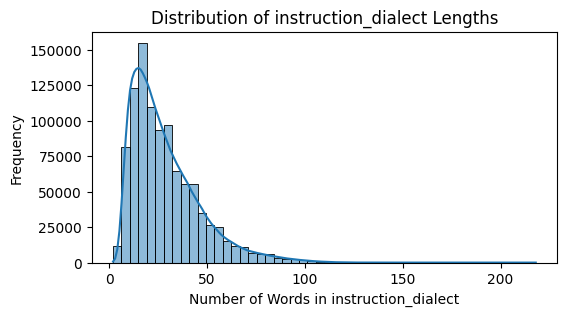

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# instruction_dialect
# sentence
dataset['num_words'] = dataset['transcription'].apply(lambda x: len(str(x).split()))

print("Question Length Summary (in number of words):")
print(dataset['num_words'].describe())

plt.figure(figsize=(6,3))
sns.histplot(dataset['num_words'], bins=50, kde=True)
plt.xlabel("Number of Words in instruction_dialect")
plt.ylabel("Frequency")
plt.title("Distribution of instruction_dialect Lengths")
plt.show()

predict2

In [66]:
print("Length of x_test:", len(x_test))
print("Length of preds:", len(preds))
print("Length of dataset['transcription']:", len(dataset['transcription']))


Length of x_test: 1002804
Length of preds: 1
Length of dataset['transcription']: 1002804


In [3]:
import joblib
import pandas as pd
import numpy as np

vectorizer = joblib.load(r"D:\LingoMalay\Models_Detect\Model4\vectorizer.pkl")
x_test_tfidf = vectorizer.transform(df["transcription"][:1000])
# print(type(x_test_tfidf))

# bayes already included vectorizer
model = joblib.load(r"D:\LingoMalay\Models_Detect\Model4\SVM.pkl")
preds = model.predict(x_test_tfidf)

submission_df = pd.DataFrame({
    'transcription': dataset['transcription'][:1000],
    'dialect': preds
})

# Save to CSV
submission_df.to_csv('prediction_SVM_1k.csv', index=False)

In [ ]:
from tqdm import tqdm

batch_size = 1000
preds = []

for i in tqdm(range(0, len(dataset), batch_size)):
    batch_texts = dataset[i:i+batch_size]
    batch_tfidf = vectorizer.transform(batch_texts)
    batch_preds = model.predict(batch_tfidf)
    preds.extend(batch_preds)


100%|██████████| 1003/1003 [46:36<00:00,  2.79s/it]   


In [7]:
print(preds[:10])
submission_df = pd.DataFrame({
    'transcription': dataset['transcription'],
    'dialect': preds
})
# Save to CSV
submission_df.to_csv('prediction_SVM.csv', index=False)

['kelantan', 'kl', 'kl', 'kl', 'sabah', 'sarawak', 'kl', 'sabah', 'kl', 'sabah']


In [7]:
def format_with_dialect(example):
    dialect = example.get('dialect', '').lower().strip() if example.get('dialect') else ''
    sentence = example.get('answer_dialect', '').strip() if example.get('answer_dialect') else ''
    dialect_token = f"<|{dialect}|>" if dialect else ''
    example['formatted_text'] = f"{dialect_token} {sentence}".strip()
    return example

dataset = dataset.map(format_with_dialect)